# COVID-19 Analysis

## Table of Contents
1. [About the authors](#About-the-authors)
    1. [Abdullah Chaudhry](#Abdullah-Chaudhry)
    2. [Claudia Raffaelli](#Claudia-Raffaelli)
2. [Introduction to the dataset](#Introduction-to-the-dataset)
3. [Getting Started](#Getting-started)
4. [Familiarizing with the dataset](#Familiarizing-with-the-dataset)
    1. [Provinces JSON](#Provinces-JSON)
    1. [Regions JSON](#Regions-JSON)
5. [Province Analysis](#Province-analysis)
6. [Region Analysis](#Region-analysis)


## About the authors

#### Abdullah Chaudhry
- Personal GitHub: https://github.com/chabdullah
- Operating System: Ubuntu 20.04 LTS
- Computer: Huawei Matebook D 14
- Processor: AMD Ryzen 5 2500U
- RAM: 8GB
- Storage: 250GB SSD + 1TB HDD
----
#### Claudia Raffaelli
- Personal GitHub: https://github.com/ClaudiaRaffaelli
- Operating System: macOS Catalina
- Computer: MacBook Pro
- Processor: 2,8 GHz Intel Core i7 quad-core
- RAM: 16GB
- Storage: 1TB SSD

## Introduction to the dataset

The analysis proposed hereafter have the purpose of uncovering the various aspects that links the cases of COVID-19 to the different regions and provinces of Italy. This work is based upon the dataset at the link [COVID-19](https://github.com/pcm-dpc/COVID-19), made available by the "Protezione Civile Italiana" organization.

The dataset under consideration has a wide repository structure, although we will just make use of two JSON files, related to the province and region data, largely discussed below. 

The COVID-19 dataset has been collecting a broad amount of data, since the beginning of the spread of the coronavirus in Italy. For this reason the gathered data, dates back to the end of February 2020 and still continues to be collected (at least as we speak, 2020-05-27).

The dataset is updated daily with the new data regarding for example the national, regional and province trends. Most of the commits add new records concerning the past day.

There are two major contributors to this project under the names: [Umbros](https://github.com/umbros) and [Pierluigicara](https://github.com/pierluigicara) in the department of Protezione Civile Italiana already mentioned.


## Getting started

As first thing, we make sure that our system satisfies the main prerequisites required to run the following code. In order to do so, we execute the subsequent Terminal commands (recognizable by the bang symbol <code>!</code>). This commands will check, and if necessary install, a few libraries.

In [42]:
!pip install matplotlib
!pip install networkx
!pip install numpy
!pip install pandas
!pip install geopandas
!pip install descartes

Importing below the required libraries used for the analysis.

In [43]:
import json
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point, Polygon
from pyproj import CRS

## Familiarizing with the dataset

To conduct the analysis we will be using two JSON file that are briefly described hereunder. 

### Provinces JSON
The first file taken into account can be reached at [this link](https://github.com/pcm-dpc/COVID-19/blob/master/dati-json/dpc-covid19-ita-province.json). Hereafter we will be referring at the collected data from this file as provinces data. 

TODO: aggiungi info
... spiegare il perché sono presenti record in <code>denominazione_provincia</code> con scritto <code>In fase di definizione/aggiornamento</code>

### Regions JSON
The Regions file, on the other hand, can be found at [this other link](https://github.com/pcm-dpc/COVID-19/blob/master/dati-json/dpc-covid19-ita-regioni.json). The data drawn from the region file will be henceforth called regions data.

TODO: aggiungi info

Now that the main features from the two files have been described, is time to load the two files and get started with the assessment.

In [44]:
with open('./dati-json/dpc-covid19-ita-province.json') as f:
    covid19_provinces_data = json.load(f)

with open('./dati-json/dpc-covid19-ita-regioni.json') as f:
    covid19_regions_data = json.load(f)

## Province analysis

Once the province data has been loaded we want to quickly show how the raw data appears with just a few refinements.
The modifications adopted are the following:
1. First is created a DataFrame <code>refined_province_data</code> in which some unnecessary columns are dropped. 
2. Morover, since inside the columm <code>denominazione_provincia</code> are present a few records labeled as <code>In fase di definizione/aggiornamento</code> that we simply discard. 
3. Lastly the <code>data</code> column has been revised so as to give it a more pleasant appearance.

The result of this readjustments is reported below.

In [45]:
# loding into a DataFrame the provinces data as is
province_data = pd.DataFrame(covid19_provinces_data)

# performing the few modifications listed above
refined_province_data = province_data[province_data.denominazione_provincia!= "In fase di definizione/aggiornamento"].drop(columns=["note_it", "note_en", "codice_provincia", "codice_regione", "stato"])

# for each date value is cropped the ending, leaving only the structure year-month-day.
# E.g. from the original date '2020-02-24T18:00:00' the result is simply '2020-02-24'
refined_province_data['data'] = refined_province_data['data'].map(lambda a: a[:10])

refined_province_data.head()

,data,denominazione_provincia,denominazione_regione,lat,long,sigla_provincia,totale_casi
0,2020-02-24,Chieti,Abruzzo,42.351032,14.167546,CH,0
1,2020-02-24,L'Aquila,Abruzzo,42.351222,13.398438,AQ,0
2,2020-02-24,Pescara,Abruzzo,42.464584,14.213648,PE,0
3,2020-02-24,Teramo,Abruzzo,42.658918,13.704400,TE,0
5,2020-02-24,Matera,Basilicata,40.667512,16.597924,MT,0


We can play a little bit with the appearance of our table, changing the key from which the table can be indexed. Different key choices can lead to different operations to be performed on the data. 

As a first approach we can think of setting the <code>data</code> column as index. The result is the following.

In [46]:
# creating a new table, in which "data" has been set as index
refined_province_data_by_date = refined_province_data.set_index("data")
refined_province_data_by_date.head()

,denominazione_provincia,denominazione_regione,lat,long,sigla_provincia,totale_casi
data,,,,,,
2020-02-24,Chieti,Abruzzo,42.351032,14.167546,CH,0
2020-02-24,L'Aquila,Abruzzo,42.351222,13.398438,AQ,0
2020-02-24,Pescara,Abruzzo,42.464584,14.213648,PE,0
2020-02-24,Teramo,Abruzzo,42.658918,13.704400,TE,0
2020-02-24,Matera,Basilicata,40.667512,16.597924,MT,0


A different approch can involve having a table in which the <code>denominazione_provincia</code> has been set as index.

In [47]:
# creating a new table, in which "denominazione_provincia" has been set as index
refined_province_data_by_province = refined_province_data.set_index("denominazione_provincia")
refined_province_data_by_province.head()

,data,denominazione_regione,lat,long,sigla_provincia,totale_casi
denominazione_provincia,,,,,,
Chieti,2020-02-24,Abruzzo,42.351032,14.167546,CH,0
L'Aquila,2020-02-24,Abruzzo,42.351222,13.398438,AQ,0
Pescara,2020-02-24,Abruzzo,42.464584,14.213648,PE,0
Teramo,2020-02-24,Abruzzo,42.658918,13.704400,TE,0
Matera,2020-02-24,Basilicata,40.667512,16.597924,MT,0


However the best way to approach this set of data is maybe having a double index involving both the cited columns.
As outer index is kept the <code>data</code> column, that regroups day by day the different provinces, each and one of them also indexed by the <code>denominazione_provincia</code> column. 

The table is sorted according to the two indexes. In this way for each date (appearing from the oldest to the newest) are shown the provinces in the same alphabetical ordering. 

Such a table can be obtained as follow.

In [48]:
# creating a new table, in which both "data" and "denominazione_provincia" has been set as index
refined_province_data_by_date_and_province = refined_province_data.set_index(["data", "denominazione_provincia"]).sort_index()
refined_province_data_by_date_and_province.head()

denominazione_regione        lat  \
data       denominazione_provincia                                    
2020-02-24 Agrigento                             Sicilia  37.309711   
           Alessandria                          Piemonte  44.912974   
           Ancona                                 Marche  43.616760   
           Aosta                           Valle d'Aosta  45.737503   
           Arezzo                                Toscana  43.466428   

                                         long sigla_provincia  totale_casi  
data       denominazione_provincia                                          
2020-02-24 Agrigento                13.584575              AG            0  
           Alessandria               8.615401              AL            0  
           Ancona                   13.518875              AN            0  
           Aosta                     7.320149              AO            0  
           Arezzo                   11.882288              AR            0

In [49]:
refined_province_data_by_date_and_province.tail()

denominazione_regione        lat  \
data       denominazione_provincia                                    
2020-05-19 Vercelli                             Piemonte  45.323981   
           Verona                                 Veneto  45.438390   
           Vibo Valentia                        Calabria  38.676241   
           Vicenza                                Veneto  45.547497   
           Viterbo                                 Lazio  42.417383   

                                         long sigla_provincia  totale_casi  
data       denominazione_provincia                                          
2020-05-19 Vercelli                  8.423234              VC         1254  
           Verona                   10.993527              VR         5040  
           Vibo Valentia            16.101574              VV           81  
           Vicenza                  11.545971              VI         2824  
           Viterbo                  12.104734              VT          421

Now that our table is ready, a first assessment could be done upon the total cases of Covid-19. We simply group upon the <code>data</code> column, summing the entries inside the <code>totale_casi</code> column. The latitude and longitude columns are dropped since they are not useful in this analysis. 

The output of such a computation is a table in which, for each day is counted the total number of cases for the whole Italy. We could have also grouped by region obtaining the total number of cases in each region day by day, but this data will be available later on in the region data file, making this computation, redundant.

In [50]:
# Grouping by date in order to see how many cases there are day by day

total_cases_by_date = refined_province_data_by_date_and_province.drop(columns=["lat", "long"]).groupby(['data']).sum()
total_cases_by_date.head()

,totale_casi
data,
2020-02-24,0
2020-02-25,312
2020-02-26,370
2020-02-27,625
2020-02-28,826


In [51]:
total_cases_by_date.tail()

,totale_casi
data,
2020-05-15,220641
2020-05-16,221498
2020-05-17,222165
2020-05-18,222613
2020-05-19,223415


This new <code>total_cases_by_date</code> table, gives us a nice idea of the trend of the new cases. But of course a graph is capable of providing a much more powerful feedback upon the data, compared to a table. 

In the following graph are shown the total number of cases from the end of February to the end of May. The x-axis is used to represent the passing of days. Not all ticks labels are visible due to the fact that this would have made unreadable the graph.

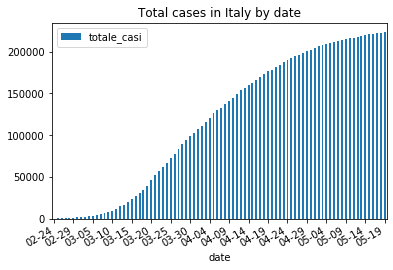

In [52]:
# plotting a graph showing day by day the number of total cases in Italy

# changing the dates for better readability 
# E.g. from the date '2020-05-17' the part involving the year is removed, leaving '05-17' as date
total_cases_by_date.rename(index=lambda s: s[5:], inplace=True)

ax = total_cases_by_date.plot(lw=2, title="Total cases in Italy by date", kind="bar")
ax.set_xlabel("date")

# sampling the dates on the ticks labels (printing a date label every 5 days)
xticks = ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 5 != 0:
        xticks[i].set_visible(False)

# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()

TODO eventualmente trarre qualche conclusione sull'aspetto della curva.. è richiesto?

Another data that can be single out from the provinces data, is the number of cases in each province up to this moment.
For each province is located the max value of <code>totale_casi</code>, that is the number of cases in that province, up to now.

With no surprises the maximum number in the total cases in each province is from the last date available, since the number of <code>totale_casi</code>, is incremented each day. 

In [53]:
max_cases_per_province = refined_province_data.drop(columns=["lat", "long"]).groupby(['sigla_provincia']).max()
max_cases_per_province.head()

,data,denominazione_provincia,denominazione_regione,totale_casi
sigla_provincia,,,,
AG,2020-05-19,Agrigento,Sicilia,141
AL,2020-05-19,Alessandria,Piemonte,3807
AN,2020-05-19,Ancona,Marche,1867
AO,2020-05-19,Aosta,Valle d'Aosta,1175
AP,2020-05-19,Ascoli Piceno,Marche,290


As done before, a result obtained in a table can be presented with a graph. In order to keep simple the appearence of the graph, and avoid it to become excessively messy, only the top 15 provinces with most cases are shown. 

Text(0.5, 1.0, 'Top 15 provinces with most cases')

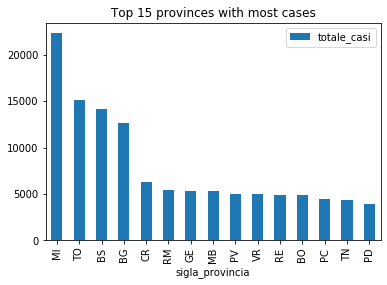

In [54]:
# Showing the top 15 provinces with the highest value on 'totale_casi'

max_cases_per_province.groupby(['sigla_provincia']).max().nlargest(15, 'totale_casi').plot(kind="bar")
plt.title("Top 15 provinces with most cases")

We could also be interested, in knowing the evolution of the distribution of total cases in the various provinces. Keeping this in mind we can collect the number of cases of each province per month and plot a pie chart to help us visualize that. 

As said before, in order to keep the view as clean as possible, we only enclose the provinces with most cases in the plot. 

As first thing is prepared the table that displays the number of cases of coronavirus per month, for each province. During this analysis are only taken into account the three months of March, April and May.

In [55]:
# creating a table with key the column sigla_provincia and data
sigla_provincia_table = refined_province_data.set_index(["sigla_provincia","data"])

# Get the provinces name in terms of sigla_provincia
provinces = refined_province_data.set_index("sigla_provincia").index.unique(level=0)

# Create a DataFrame with total cases per month for each province
cases_per_month = {}

# iterating through the provinces and setting the max cases per month in the proper dictionary
for province in provinces: 
    province_info = sigla_provincia_table.loc[province]
    # The 'groupby(province_info.data.str[:7]' is used to group the rows according to the month
    # The [:7] is used to slice the first 7 letters of the 'data' column
    # 2020-05-15 ---> 2020-05
    # And finally we take the max from 'totale_casi' per each province, each month
    cases_per_month[province] = pd.Series(province_info.groupby(province_info.index.str[:7])['totale_casi'].max())

# Create the DataFrame using the Series defined in the for loop
cpm = pd.DataFrame(cases_per_month)
cpm = cpm.T # For a better view

# the February column is not of our interest. The data collected during this month is not enough to obtain a proper
# analysis 
cpm = cpm.drop(columns=['2020-02'])
cmp = cpm.sort_index()

# showing below the new table of cases per month.
cmp.head()

data,2020-03,2020-04,2020-05
AG,94,135,141
AL,1317,3417,3807
AN,1116,1810,1867
AO,628,1128,1175
AP,222,281,290


TODO: inserire la parte dei grafici a torta e barre qui

It can also be shown a graph that displays the trend of total cases, day by day for the most infected provinces. To keep the graph simple, like always are not shown all the provinces. In this case are only presented the eight worst. 

On the x-axis is placed the passing of days, and the vertical bar, labeled as <code>Lockdown</code> is put to indicate the beginning of the lockdown, enforced by the government in Italy. 

TODO: inserire qui il grafico dove viene mostrato inizio lockdown

## Region Analysis

As already seen with the provinces data, the first thing we want to show, is how the raw data from the region file is presented to us, with just a few adjustments. 

The modifications adopted are the following:

- As before is created a DataFrame <code>refined_region_data</code> in which some unnecessary columns are dropped,
- Also, just as with the province data, the date is reformatted cropping out useless data,
- Some of the data related, for example, to the column <code>casi_testati</code>, are not available and displayed as <code>NaN</code>. For better working with the data, we prefer to handle this kind as missing data by replacing it with 0.

The result of this operations is reported below.

In [56]:
# loding into a DataFrame the regions data as is
region_data = pd.DataFrame(covid19_regions_data)

# performing the few modifications listed above
#refined_region_data = region_data[province_data.denominazione_provincia!= "In fase di definizione/aggiornamento"].drop(columns=["note_it", "note_en", "codice_provincia", "codice_regione", "stato"])
refined_region_data = region_data.drop(columns=["stato", "note_en", "note_it", "lat", "long", "codice_regione"])

# for each date value is cropped the ending, leaving only the structure year-month-day.
# E.g. from the original date '2020-02-24T18:00:00' the result is simply '2020-02-24'
refined_region_data['data'] = refined_region_data['data'].map(lambda a: a[:10])

# we want to handle missing data as 0
refined_region_data = refined_region_data.fillna(0)
refined_region_data.fillna(0).head()


,casi_testati,data,deceduti,denominazione_regione,dimessi_guariti,isolamento_domiciliare,nuovi_positivi,ricoverati_con_sintomi,tamponi,terapia_intensiva,totale_casi,totale_ospedalizzati,totale_positivi,variazione_totale_positivi
0,0.0,2020-02-24,0,Abruzzo,0,0,0,0,5,0,0,0,0,0
1,0.0,2020-02-24,0,Basilicata,0,0,0,0,0,0,0,0,0,0
2,0.0,2020-02-24,0,P.A. Bolzano,0,0,0,0,1,0,0,0,0,0
3,0.0,2020-02-24,0,Calabria,0,0,0,0,1,0,0,0,0,0
4,0.0,2020-02-24,0,Campania,0,0,0,0,10,0,0,0,0,0


For the next computations we are interested in using as index for the region table, the column <code>denominazione_regione</code> and <code>data</code>. Also the records are sorted according to both index.

In [57]:
regions_data_frame = refined_region_data.set_index(["denominazione_regione", "data"]).sort_index()
regions_data_frame.head()

casi_testati  deceduti  dimessi_guariti  \
denominazione_regione data                                                  
Abruzzo               2020-02-24           0.0         0                0   
                      2020-02-25           0.0         0                0   
                      2020-02-26           0.0         0                0   
                      2020-02-27           0.0         0                0   
                      2020-02-28           0.0         0                0   

                                  isolamento_domiciliare  nuovi_positivi  \
denominazione_regione data                                                 
Abruzzo               2020-02-24                       0               0   
                      2020-02-25                       0               0   
                      2020-02-26                       0               0   
                      2020-02-27                       0               1   
                      2020-02-28                       0               0   

                                  ricoverati_con_sintomi  tamponi  \
denominazione_regione data                                          
Abruzzo               2020-02-24                       0        5   
                      2020-02-25                       0        5   
                      2020-02-26                       0       13   
                      2020-02-27                       1       33   
                      2020-02-28                       1       33   

                                  terapia_intensiva  totale_casi  \
denominazione_regione data                                         
Abruzzo               2020-02-24                  0            0   
                      2020-02-25                  0            0   
                      2020-02-26                  0            0   
                      2020-02-27                  0            1   
                      2020-02-28                  0            1   

                                  totale_ospedalizzati  totale_positivi  \
denominazione_regione data                                                
Abruzzo               2020-02-24                     0                0   
                      2020-02-25                     0                0   
                      2020-02-26                     0                0   
                      2020-02-27                     1                1   
                      2020-02-28                     1                1   

                                  variazione_totale_positivi  
denominazione_regione data                                    
Abruzzo               2020-02-24                           0  
                      2020-02-25                           0  
                      2020-02-26                           0  
                      2020-02-27                           1  
                      2020-02-28                           0

Below we want to show a quick view on the data gathered, for just a few regions, taken as sample. In order to do so, are taken into account seven regions, the most representative. 

The plots are organized in different subplots. Each subplot indicates a different area of interest, while highlighting the differences between regions represented as different lines.

Particular interest is placed on ephasize the transition from the period pre-lockdown, to post-lockdown. 

TODO: chiedi spiegazioni. 
The vertical, red line indicates exactly the day of the beginning of the period of quarantine. 


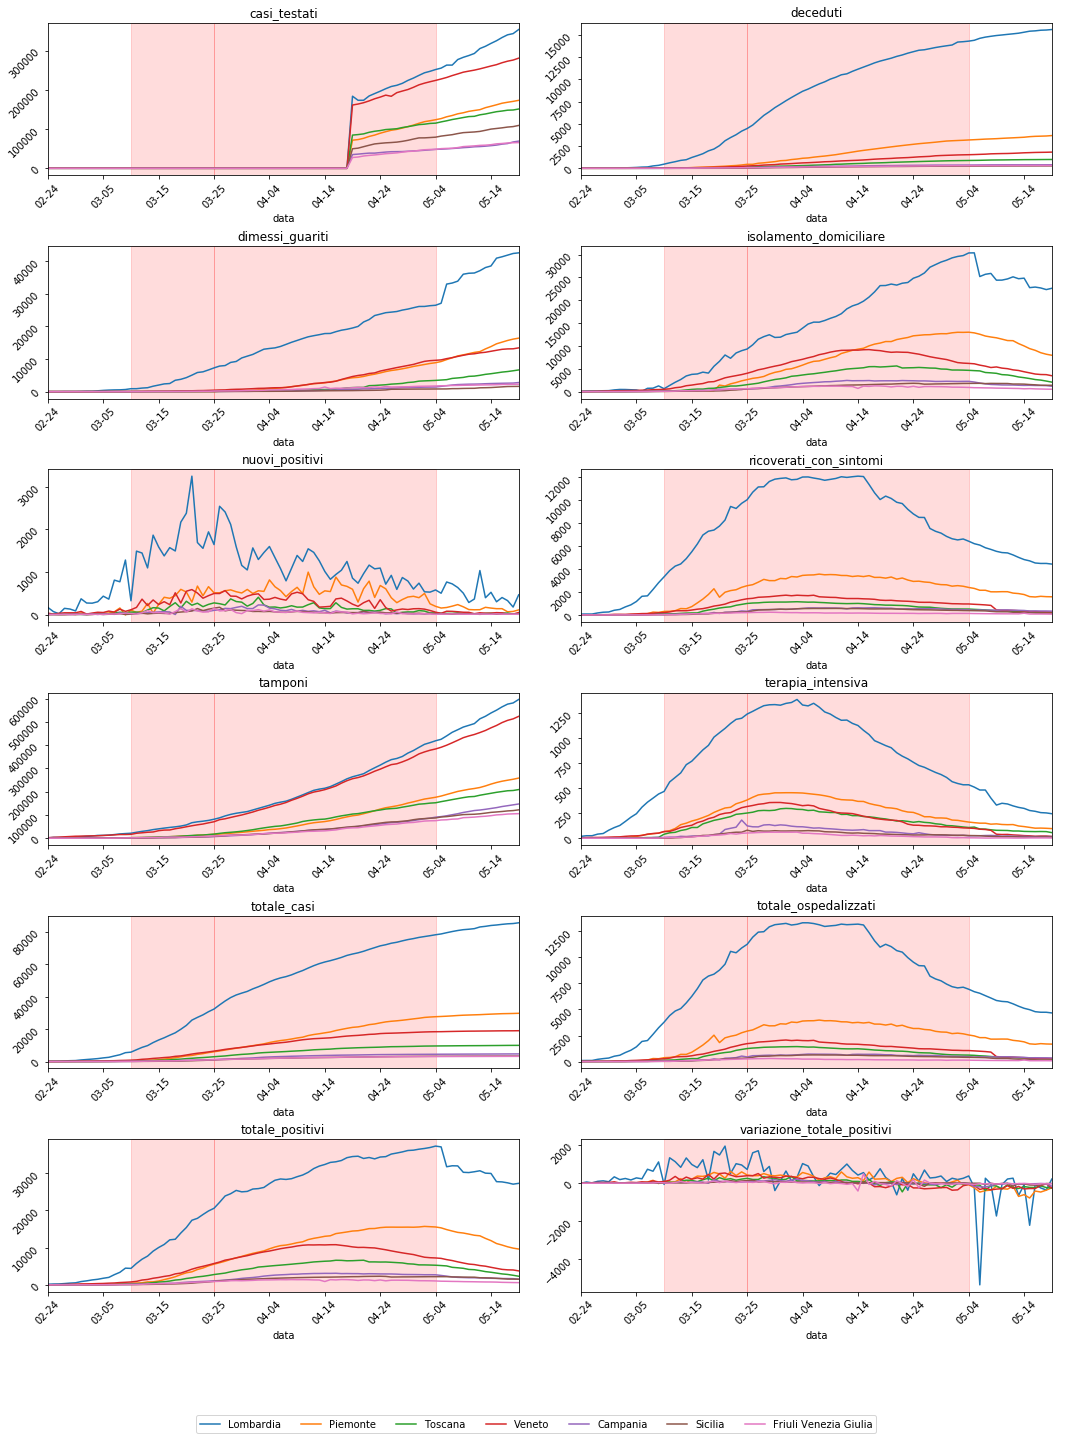

In [61]:
regions_considered = ['Lombardia', 'Piemonte', 'Toscana', 'Veneto', 'Campania', 'Sicilia', 'Friuli Venezia Giulia']
grid_size = (6, 2) # (#regions x #columns's info)
fig, axes = plt.subplots(nrows=grid_size[0], ncols=grid_size[1], sharex=False, figsize=(15,20))

i = 0
r, c = (0,0)
x_labels = regions_data_frame.index.unique(level=1)
x_labels = [elem[5:10] for elem in x_labels] # take only the month and the day, cut off the rest
for column_info in regions_data_frame.columns:
    for region in regions_considered:
        regions_data_frame.loc[region][column_info].plot(ax=axes[r,c], kind='line', title=column_info)
        axes[r,c].axvspan(15, 30, color='red', alpha=0.02) # Start of lockdown
        axes[r,c].axvspan(30, 70, color='red', alpha=0.02) # Lockdown's effects after 14 days
        # Calculate the xlabels for each subplot
        plt.sca(axes[r, c])
        plt.xticks(range(len(x_labels)), x_labels)
        xticks = axes[r,c].xaxis.get_major_ticks()
        for i in range(len(xticks)):
            if i % 10 != 0:
                xticks[i].set_visible(False)
        axes[r,c].tick_params(labelrotation=45)
        
    # Calculate the next subplot's indexes
    c = (c+1)%grid_size[1]
    if c == 0:
        r+=1
        
plt.tight_layout()
fig.subplots_adjust(bottom=0.1)
fig.legend(labels=regions_considered, loc="lower center", ncol=len(regions_considered))

TODO: fixed 'till this point